# Neural Network Training: Implementing Backpropagation and Model Optimization

In [39]:
import numpy as np
from model import NN, Layer
import matplotlib.pyplot as plt
import networkx as nx
from pprint import pprint
import time


The goal of this project is to create a neural network with 3 layers: input - hidden - output. Both the input layer and the output layer will have 8 nodes, the hidden layer only 3 nodes(+ biases).

The learning examples will each have 7 zeros and 1 one in them(so there will be only 8 different learning examples, and you will have to repeat the,) and the ouput the network should learn is exactly the same as the input.  So when the input layer is given < 0,0,0,1,0,0,0,0 > as input, the output to aim for is also < 0,0,0,1,0,0,0,0 >.

We train the neural network using **Online Gradient Descent**.

We want our network to learn this reproducing function on the 8 different learning examples. 

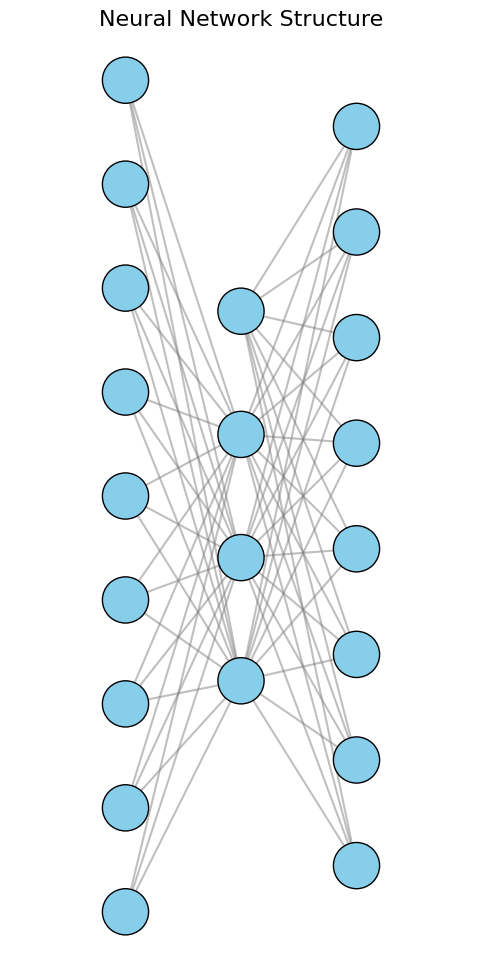

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_neural_network(layer_sizes, neuron_radius=0.5, exclude_bias_connections=True):
    x_spacing = 2.5
    y_spacing = 2.0
    
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.axis('off')

    x_positions = np.arange(len(layer_sizes)) * x_spacing

    for layer_idx, num_neurons in enumerate(layer_sizes):
        y_positions = np.linspace(-num_neurons * y_spacing / 2, num_neurons * y_spacing / 2, num_neurons)
        
        for y in y_positions:
            ax.add_patch(plt.Circle((x_positions[layer_idx], y), neuron_radius, color='skyblue', ec='black', zorder=2))
        
        if layer_idx < len(layer_sizes) - 1:
            next_y_positions = np.linspace(-layer_sizes[layer_idx + 1] * y_spacing / 2, layer_sizes[layer_idx + 1] * y_spacing / 2, layer_sizes[layer_idx + 1])
            
            for i, y_current in enumerate(y_positions):
                for j, y_next in enumerate(next_y_positions):
                    if exclude_bias_connections and layer_idx == 0 and j == len(next_y_positions) - 1:
                        continue
                    ax.plot([x_positions[layer_idx], x_positions[layer_idx + 1]], [y_current, y_next], 'gray', alpha=0.5, zorder=1)

    ax.set_aspect('equal')
    ax.set_xlim(-x_spacing, x_positions[-1] + x_spacing)
    ax.set_ylim(-max(layer_sizes) * y_spacing / 2 - 1, max(layer_sizes) * y_spacing / 2 + 1)
    plt.title("Neural Network Structure", fontsize=16)
    plt.show()

layer_sizes = [9,4, 8]
plot_neural_network(layer_sizes)




**NETWORK CREATION AND TRAINING**

We train out network with a total of 10000 epochs.

Epoch 0 - Loss: 1.8956479693922232
Epoch 1000 - Loss: 0.12585317909085247
Epoch 2000 - Loss: 0.05393167018764804
Epoch 3000 - Loss: 0.02722185407151389
Epoch 4000 - Loss: 0.016370908726974935
Epoch 5000 - Loss: 0.01097659930373127
Epoch 6000 - Loss: 0.007957003866332756
Epoch 7000 - Loss: 0.005892050690598068
Epoch 8000 - Loss: 0.004574825042500007
Epoch 9000 - Loss: 0.003595469532205591
Training time: 8.017659187316895 seconds


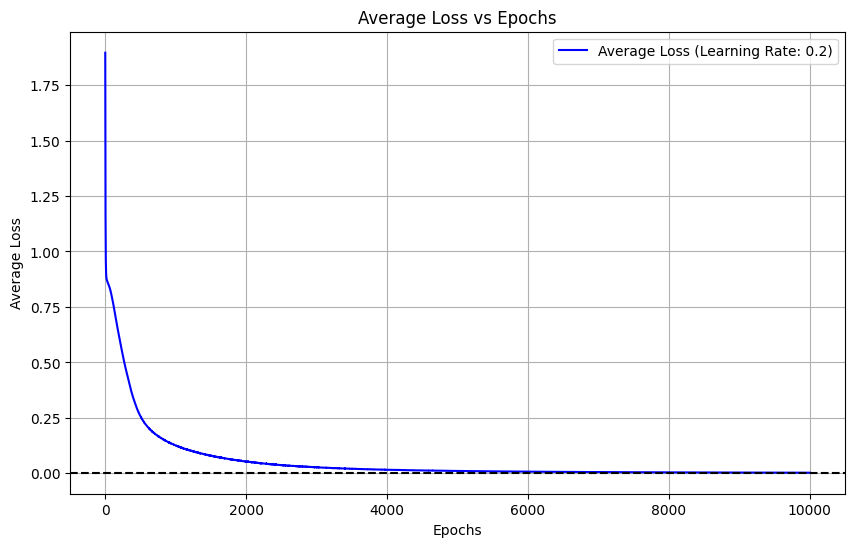

In [40]:
X = np.eye(8)

hidden_layer_size = 3

layers = [
    Layer(8, hidden_layer_size, "sigmoid"),
    Layer(hidden_layer_size, 8, "sigmoid"),
]

start = time.time()
nn = NN(layers=layers, lr=0.2)
nn.train(X, 10000)
end = time.time()
print(f"Training time: {end - start} seconds")
losses = nn.losses
plt.figure(figsize=(10, 6))
plt.plot(
    losses, label=f"Average Loss (Learning Rate: {nn.learning_rate})", color="blue"
)
plt.title("Average Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.grid()
plt.axhline(y=0, color="black", linestyle="--")
plt.legend()
plt.show()
plt.show()

We see that the nn needs around 5000 epochs to converge to very low values.

In [12]:
for i in range(8):
    print("Input:", X[i])
    print("Output:", np.round(nn.forward(X[i]), 2))
    print()


Input: [1. 0. 0. 0. 0. 0. 0. 0.]
Output: [[0.94 0.   0.   0.   0.03 0.04 0.01 0.  ]]

Input: [0. 1. 0. 0. 0. 0. 0. 0.]
Output: [[0.   0.97 0.01 0.   0.   0.   0.   0.  ]]

Input: [0. 0. 1. 0. 0. 0. 0. 0.]
Output: [[0.   0.02 0.95 0.   0.   0.01 0.02 0.01]]

Input: [0. 0. 0. 1. 0. 0. 0. 0.]
Output: [[0.   0.01 0.   0.96 0.03 0.   0.   0.04]]

Input: [0. 0. 0. 0. 1. 0. 0. 0.]
Output: [[0.01 0.   0.   0.02 0.95 0.   0.   0.  ]]

Input: [0. 0. 0. 0. 0. 1. 0. 0.]
Output: [[0.04 0.   0.   0.   0.   0.85 0.   0.05]]

Input: [0. 0. 0. 0. 0. 0. 1. 0.]
Output: [[0.   0.   0.02 0.   0.   0.   0.97 0.  ]]

Input: [0. 0. 0. 0. 0. 0. 0. 1.]
Output: [[0.   0.   0.01 0.02 0.   0.07 0.   0.86]]



We observe that the neural network, with a learning rate of 0.2, is able to correctly predict the desired output, with very low levels of loss in terms of mean squared error.

--------------------------------------------------
Learning Rate: 0.001
--------------------------------------------------
Epoch 0 - Loss: 0.008737117539460562
Epoch 1000 - Loss: 0.008747028012670393
Epoch 2000 - Loss: 0.008744367308523196
Epoch 3000 - Loss: 0.008737011677252923
Epoch 4000 - Loss: 0.008728461159096888
Epoch 5000 - Loss: 0.008719809502799039
Epoch 6000 - Loss: 0.008711171505001244
Epoch 7000 - Loss: 0.008702405577525552
Epoch 8000 - Loss: 0.008692817294204824
Epoch 9000 - Loss: 0.008685097518729324
--------------------------------------------------
Learning Rate: 0.002
--------------------------------------------------
Epoch 0 - Loss: 0.00867626438879037
Epoch 1000 - Loss: 0.008657503135523291
Epoch 2000 - Loss: 0.008640311867957993
Epoch 3000 - Loss: 0.00862295126237724
Epoch 4000 - Loss: 0.008604168922608759
Epoch 5000 - Loss: 0.008587517266460457
Epoch 6000 - Loss: 0.008569064724648249
Epoch 7000 - Loss: 0.00855251897188632
Epoch 8000 - Loss: 0.008534821991476017
Epo

c:\Users\Aurora Pia Ghiardell\Documents\Advance Machine Learning\aml_assigments\model.py:4: RuntimeWarning: overflow encountered in exp
  "sigmoid": lambda x: 1 / (1 + np.exp(-x)),


Epoch 9000 - Loss: 0.0011521157653354046


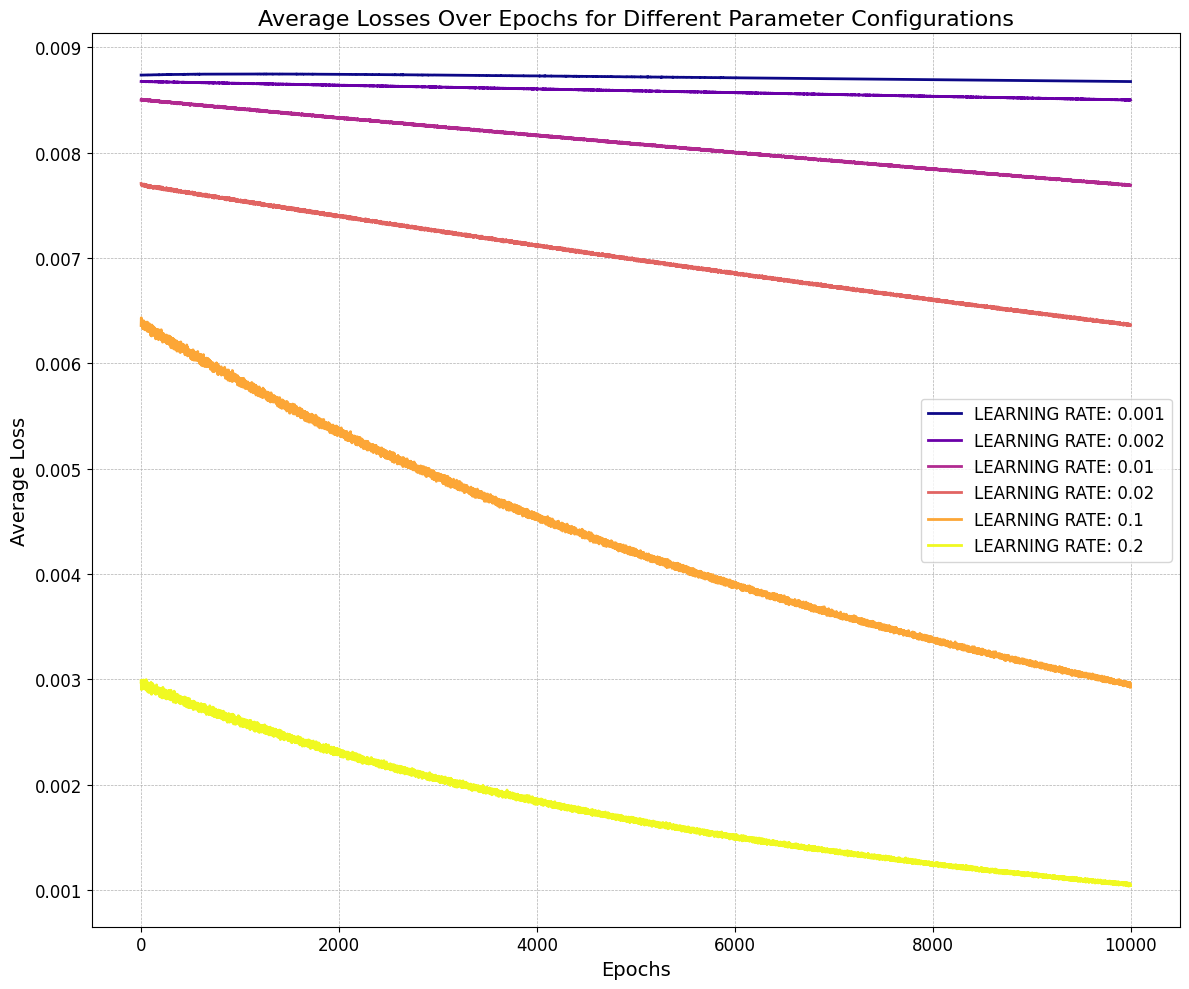

In [30]:
lrs = [0.001, 0.002, 0.01, 0.02, 0.1, 0.2]

num_configs = len(lrs)
losses = dict()
for lr in lrs:
    print("-" * 50)
    print(f"Learning Rate: {lr}")
    print("-" * 50)
    nn = NN(layers=layers, lr=lr)
    nn.train(X, 10000)
    losses[(lr)] = nn

plt.figure(figsize=(12, 10))
colors = plt.cm.plasma(np.linspace(0, 1, num_configs))
i = 0

for lr in lrs:
    net: NN = losses[(lr)]
    plt.plot(
        net.losses,
        color=colors[i],
        linewidth=2,
        label=f"LEARNING RATE: {lr}",
    )
    i += 1

plt.title(
    "Average Losses Over Epochs for Different Parameter Configurations", fontsize=16
)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Average Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

This plot shows the "Average Losses Over Epochs for Different Parameter Configurations," with different curves representing various learning rates used during training.

**Lower Learning Rates (0.001 and 0.002):**

The lines are flatter, with slower convergence over epochs.
While these rates eventually reduce loss, the process is much slower, suggesting that the model is not learning as quickly as it could.

**Moderate Learning Rates (0.01 and 0.02):**

These curves show a steeper decline in loss, indicating faster learning compared to lower rates.
The learning appears stable, and these rates may offer a good balance between speed and stability for training.

**Higher Learning Rates (0.1 and 0.2):**
The yellow (0.2) and orange (0.1) lines show the steepest drop in loss, indicating the fastest learning.
However, high learning rates risk overshooting the optimal solution or causing instability. The yellow line (0.2) shows a steady decrease without signs of divergence, suggesting that 0.2 is still stable for this model.

## WEIGHTS ANALYSIS
The two heatmaps you provided represent the weight matrices of two different layers in a neural network.


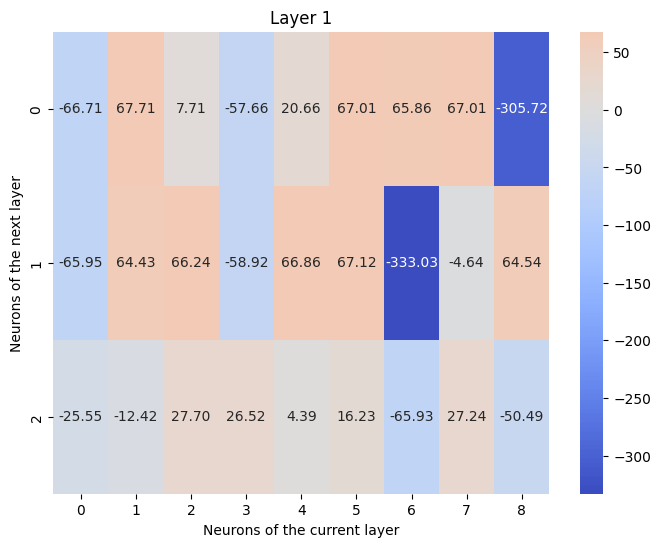

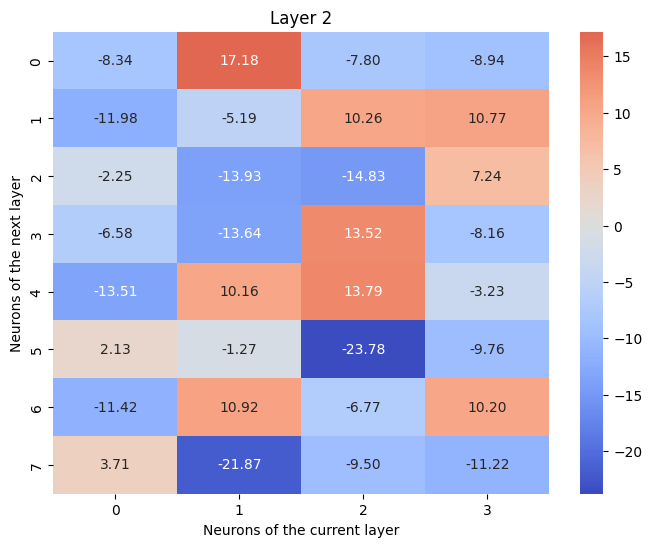

In [ ]:
import seaborn as sns
nn = NN(layers=layers, lr=0.2)

for i in range(len(layers)):
    weights_with_biases = np.concatenate(
        [nn.layers[i].biases, nn.layers[i].weights], axis=0
    )
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights_with_biases.T, cmap="coolwarm", annot=True, fmt=".2f", center=0)
    plt.title("Layer " + str(i + 1))
    plt.xlabel("Neurons of the current layer")
    plt.ylabel("Neurons of the next layer")
    plt.show()

**Layer 1**

The heatmap of Layer 1 has a weight matrix with significant variation in values, as indicated by the color scale. We can see that there are both large positive and large negative weights. For instance, the color scale shows values close to +67 for some weights (indicated in light orange), while others reach as low as −333.03 (dark blue).
The extreme negative values, especially around −305.72 and −333.03, could indicate connections that have a strong inhibitory effect in this layer.

These neurons are thus the ones that have highly influential connections compared to others.

**Layer 2**

Similar to Layer 1, Layer 2 shows a mix of positive and negative weights, though the range of values is less extreme. The highest positive value in this layer is 17.18, while the lowest is approximately −23.78, indicating more moderate weights relative to Layer 1.
The colors are more evenly distributed across this heatmap, suggesting a balanced set of connections without extreme outliers. This could imply a more stable influence of weights in this layer.

**ACTIVATION FUNCTION VIEW**

These heatmaps visualize the activations of two layers in a neural network.
The x-axis represents the individual neurons within Layer 1, and the y-axis  represents different data samples or inputs.

The color scale on the right indicates activation values, with dark blue representing values close to 0 and bright yellow representing higher activation values.

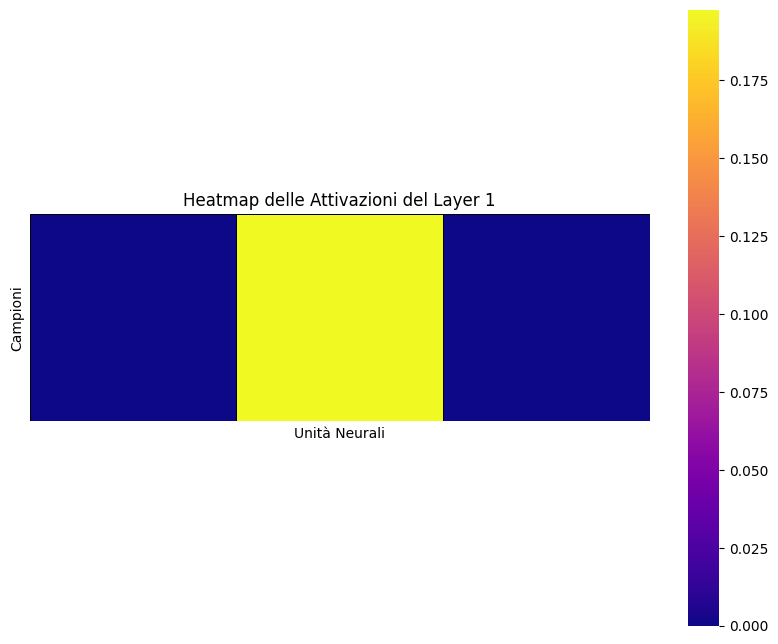

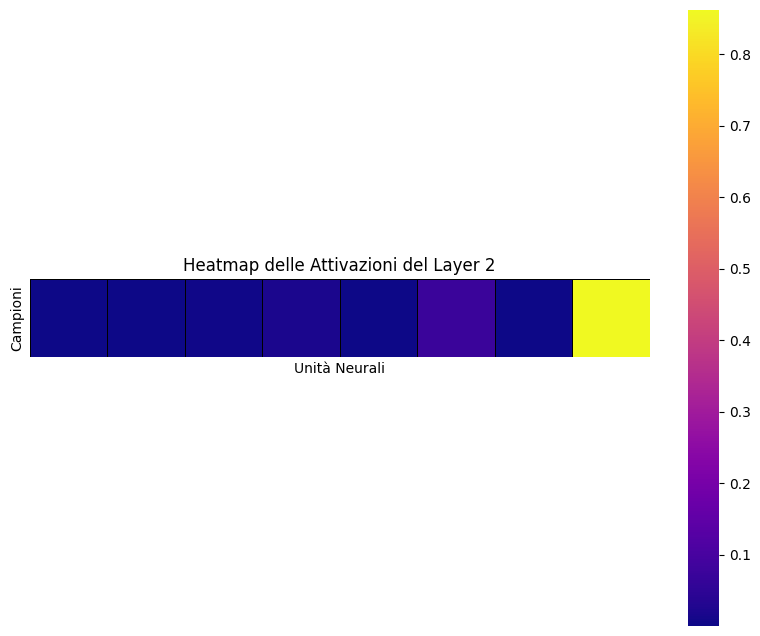

In [ ]:
import seaborn as sns
cmap = "plasma"


for i, layer in enumerate(nn.layers):
    plt.figure(figsize=(10, 8))
    
    activation_matrix = np.array(layer.layer_output)

    sns.heatmap(
        activation_matrix,
        cmap=cmap,
        cbar=True,
        xticklabels=False,
        yticklabels=False,
        square=True,
        linewidths=0.5,
        linecolor='black'
    )
    
    plt.title(f"Heatmap of Activations for Layer {i + 1}")
    plt.xlabel("Neurons")
    plt.ylabel("Samples")
    plt.show()





### Heatmap of Layer 1

In this heatmap, the first and the third neurons is dark blue (activation near 0) except for the second one that is brightly colored (around 0.1 to 0.15), the only one with an important activation and that contributes the most to the output. 
This aligns with the previous analysis showing sparse activation in Layer 1.

### Heatmap of Layer 2
Unlike Layer 1, Layer 2 has a greater variety of activation levels, including some with high activations (yellow) and others with low activations (dark blue and purple).
This indicates more variability in the activation patterns of Layer 2, with certain neurons being significantly activated for specific samples, which could reflect a more complex processing layer.
